<a href="https://colab.research.google.com/github/ishanmorwal/Rock-Paper-Scissors/blob/main/RockPaperScissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
We all know and enjoy Stone,Paper,Scissors. It is a very popular game and rightfully so, for its simplicity yet enjoyability is off the charts. This model here, is an image classification model to classify an image as either the image of a stone or a paper or a scissors in the Sign Language.

In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

After the imports, we download the dataset and unzip it.

In [2]:
# prompt: download and unzip the kaggle stone-paper-scissors dataset
!wget --no-check-certificate \
"https://storage.googleapis.com/download.tensorflow.org/data/rps.zip"\
-O "/tmp/rps.zip"
lzip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(lzip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()


--2024-02-10 09:10:34--  https://storage.googleapis.com/download.tensorflow.org/data/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c0d::cf, 2607:f8b0:4023:c06::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  68.7MB/s    in 2.8s    

2024-02-10 09:10:37 (68.7 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]



The dataset is now downloaded and stored within the /tmp directory and is extracted. Within it, there

In [3]:
src_path = '/tmp/rps'

src_path_rock     = os.path.join(src_path,'rock')
src_path_paper    = os.path.join(src_path,'paper')
src_path_scissors = os.path.join(src_path,'scissors')
# to Delete all non-image files
!find /tmp/rps/ -type f ! -name "*.png" -exec rm {} +
# Prints out the number of images in the sub-directories
print(f"There are {len(os.listdir(src_path_rock))} images of Rock in sign language.")
print(f"There are {len(os.listdir(src_path_paper))} images of Paper in sign language.")
print(f"There are {len(os.listdir(src_path_scissors))} images of Scissors in sign language.")


There are 840 images of Rock in sign language.
There are 840 images of Paper in sign language.
There are 840 images of Scissors in sign language.


Now we divide the data contained into training and validation directories.

In [4]:
root_dir = '/tmp/Rock-paper-scissors'

# Makes sure directory is empty
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# This function takes the root as argument and creates the directories

def create_train_val_dirs(root_path):
  os.makedirs(os.path.join(root_path,'training'))
  os.makedirs(os.path.join(root_path,'validation'))
  os.makedirs(os.path.join(root_path,'training/rock'))
  os.makedirs(os.path.join(root_path,'training/paper'))
  os.makedirs(os.path.join(root_path,'training/scissors'))
  os.makedirs(os.path.join(root_path,'validation/rock'))
  os.makedirs(os.path.join(root_path,'validation/paper'))
  os.makedirs(os.path.join(root_path,'validation/scissors'))

try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("Only happens if the root_dir is not empty, which should not be the case here.")

In [5]:
# For testing the above code:

for rootdir,dirs,files in os.walk(root_dir):
  for subdir in dirs:
    print(os.path.join(rootdir,subdir))

/tmp/Rock-paper-scissors/validation
/tmp/Rock-paper-scissors/training
/tmp/Rock-paper-scissors/validation/paper
/tmp/Rock-paper-scissors/validation/rock
/tmp/Rock-paper-scissors/validation/scissors
/tmp/Rock-paper-scissors/training/paper
/tmp/Rock-paper-scissors/training/rock
/tmp/Rock-paper-scissors/training/scissors


The next logical step here, is to split the data to populate the various directories in a random fashion. We do that using a `split_data` function, which takes the source directory, the training and validation directories as the arguments, along with a `split_size` as well, which determines the ratio of images used for training versus validation.

Plus, to maintain the correctness of our dataset, we need to put in place a check that ensures that there are no files that have zero-length.

In [6]:
def split_data(SOURCE_DIR,TRAINING_DIR,VALIDATION_DIR,SPLIT_SIZE):
  filtered = []

  for file_name in os.listdir(SOURCE_DIR):
    file_path = os.path.join(SOURCE_DIR,file_name)
    if os.path.getsize(file_path):
      filtered.append(file_name)
    else:
      print(f"{file_name} is zero length, so ignoring")

  random_files = random.sample(filtered,len(filtered))
  split = int(SPLIT_SIZE*len(filtered))
  training_files = random_files[:split]
  validation_files = random_files[split:]

  for file_name in training_files:
    copyfile(os.path.join(SOURCE_DIR,file_name),os.path.join(TRAINING_DIR,file_name))

  for file_name in validation_files:
    copyfile(os.path.join(SOURCE_DIR,file_name),os.path.join(VALIDATION_DIR,file_name))


That was just the division of data into Training and Validation directories. Now, we set up the directories of the three classes, Rock, Paper and Scissors.

In [7]:
ROCK_SRC_DIR = "/tmp/rps/rock/"
PAPER_SRC_DIR = "/tmp/rps/paper/"
SCI_SRC_DIR = "/tmp/rps/scissors/"

TRAINING_DIR = "/tmp/Rock-paper-scissors/training/"
VALIDATION_DIR = "/tmp/Rock-paper-scissors/validation/"

TRAINING_ROCK_DIR = os.path.join(TRAINING_DIR,"rock/")
TRAINING_PAPER_DIR = os.path.join(TRAINING_DIR,"paper/")
TRAINING_SCISSORS_DIR = os.path.join(TRAINING_DIR,"scissors/")

VALIDATION_ROCK_DIR = os.path.join(VALIDATION_DIR,"rock/")
VALIDATION_PAPER_DIR = os.path.join(VALIDATION_DIR,"paper/")
VALIDATION_SCISSORS_DIR = os.path.join(VALIDATION_DIR,"scissors/")

if len(os.listdir(TRAINING_ROCK_DIR)) > 0:
  for file in os.scandir(TRAINING_ROCK_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_PAPER_DIR)) > 0:
  for file in os.scandir(TRAINING_PAPER_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_SCISSORS_DIR)) > 0:
  for file in os.scandir(TRAINING_SCISSORS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_ROCK_DIR)) > 0:
  for file in os.scandir(VALIDATION_ROCK_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_PAPER_DIR)) > 0:
  for file in os.scandir(VALIDATION_PAPER_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_SCISSORS_DIR)) > 0:
  for file in os.scandir(VALIDATION_SCISSORS_DIR):
    os.remove(file.path)

split_data(ROCK_SRC_DIR,TRAINING_ROCK_DIR,VALIDATION_ROCK_DIR,.9)
split_data(PAPER_SRC_DIR,TRAINING_PAPER_DIR,VALIDATION_PAPER_DIR,.9)
split_data(SCI_SRC_DIR,TRAINING_SCISSORS_DIR,VALIDATION_SCISSORS_DIR,.9)

print(f"\n Original rock directory had: {len(os.listdir(ROCK_SRC_DIR))} images")
print(f"\n Original paper directory had: {len(os.listdir(PAPER_SRC_DIR))} images")
print(f"\n Original scissors directory had: {len(os.listdir(SCI_SRC_DIR))} images")

print(f"\nThere are {len(os.listdir(TRAINING_ROCK_DIR))} images of rock for training")
print(f"\nThere are {len(os.listdir(TRAINING_PAPER_DIR))} images of paper for training")
print(f"\nThere are {len(os.listdir(TRAINING_SCISSORS_DIR))} images of scissors for training")
print(f"\nThere are {len(os.listdir(VALIDATION_ROCK_DIR))} images of rock for validation")
print(f"\nThere are {len(os.listdir(VALIDATION_PAPER_DIR))} images of paper for validation")
print(f"\nThere are {len(os.listdir(VALIDATION_SCISSORS_DIR))} images of scissors for validation")




 Original rock directory had: 840 images

 Original paper directory had: 840 images

 Original scissors directory had: 840 images

There are 756 images of rock for training

There are 756 images of paper for training

There are 756 images of scissors for training

There are 84 images of rock for validation

There are 84 images of paper for validation

There are 84 images of scissors for validation


# Generators
The next important step in the creation of an image classification model is always the coding of the *ImageDataGenerators* . What it does is it transforms the image (that is, performs the required functions like scaling, resizing) so that data can be generated for the model to be trained upon.

In [8]:
def train_val_generators(TRAINING_DIR,VALIDATION_DIR):
  train_datagen = ImageDataGenerator(rescale=1.0/255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=.2,
                                     zoom_range=.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')
  train_generator = train_datagen.flow_from_directory(
      TRAINING_DIR,
      target_size=(150,150),
      class_mode="categorical",
      batch_size=42
  )

  validation_datagen = ImageDataGenerator(rescale=1.0/255)
  validation_generator = validation_datagen.flow_from_directory(
      VALIDATION_DIR,
      target_size=(150,150),
      class_mode='categorical',
      batch_size=42
  )
  return train_generator,validation_generator

In [11]:
train_generator,validation_generator = train_val_generators(TRAINING_DIR,VALIDATION_DIR)

Found 2268 images belonging to 3 classes.
Found 252 images belonging to 3 classes.


# Model creation
We will now build our Image Classification model. To avoid overfitting we would append a Dropout layer.

In [12]:
def create_model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2,),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
  ])
  from tensorflow.keras.optimizers import RMSprop
  model.compile(optimizer=RMSprop(learning_rate=1e-3),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [13]:
# Now we run our model

model = create_model()

history = model.fit(train_generator,
                    epochs=25,
                    steps_per_epoch=20,
                    validation_data=validation_generator,
                    verbose=1,
                    validation_steps=3
                    )

Epoch 1/25
20/20 [==============================] - 15s 393ms/step - loss: 1.2672 - accuracy: 0.3310 - val_loss: 1.0915 - val_accuracy: 0.3571
Epoch 2/25
20/20 [==============================] - 9s 433ms/step - loss: 1.1057 - accuracy: 0.3560 - val_loss: 1.0957 - val_accuracy: 0.4921
Epoch 3/25
20/20 [==============================] - 8s 404ms/step - loss: 1.0859 - accuracy: 0.3536 - val_loss: 0.9758 - val_accuracy: 0.5635
Epoch 4/25
20/20 [==============================] - 7s 374ms/step - loss: 1.2725 - accuracy: 0.4048 - val_loss: 0.9943 - val_accuracy: 0.7619
Epoch 5/25
20/20 [==============================] - 8s 376ms/step - loss: 0.9837 - accuracy: 0.5012 - val_loss: 1.7999 - val_accuracy: 0.3651
Epoch 6/25
20/20 [==============================] - 8s 422ms/step - loss: 0.9638 - accuracy: 0.4988 - val_loss: 0.6053 - val_accuracy: 0.6508
Epoch 7/25
20/20 [==============================] - 8s 425ms/step - loss: 0.8584 - accuracy: 0.6060 - val_loss: 0.4940 - val_accuracy: 0.8175
Epoch

For further analysis of our model, we can plot our output using matplotlib.

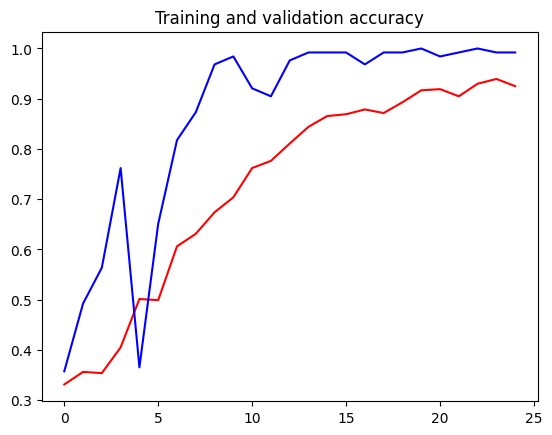

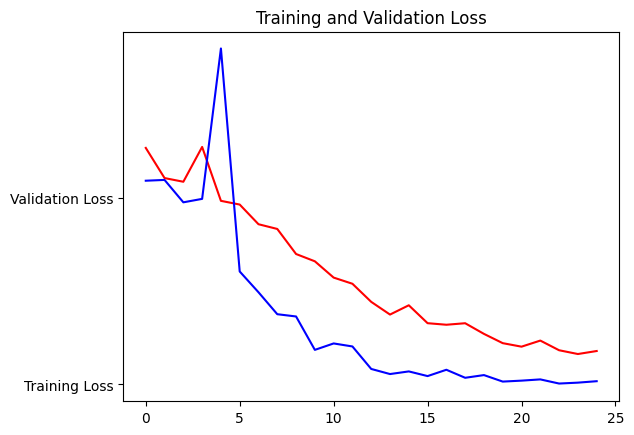

In [14]:
# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'r',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validaiton accuracy')
plt.title('Training and validation accuracy')
plt.show()
print("")

plt.plot(epochs,loss,'r',"Training Loss")
plt.plot(epochs,val_loss,'b',"Validation Loss")
plt.title("Training and Validation Loss")
plt.show()
print("")


# Model prediction
With the help of our Model, now we can classify an image of a hand as either Rock, Paper or Scissors. Here is the code necessary to take user input


Saving paper6.png to paper6.png
Saving rock1.png to rock1 (1).png
Saving scissors5.png to scissors5.png
Saving scissors-hires1.png to scissors-hires1.png
1/1 [==============================] - 0s 29ms/step
paper6.png
Paper
1/1 [==============================] - 0s 18ms/step
rock1 (1).png
Rock
1/1 [==============================] - 0s 17ms/step
scissors5.png
Scissors
1/1 [==============================] - 0s 17ms/step
scissors-hires1.png
Scissors


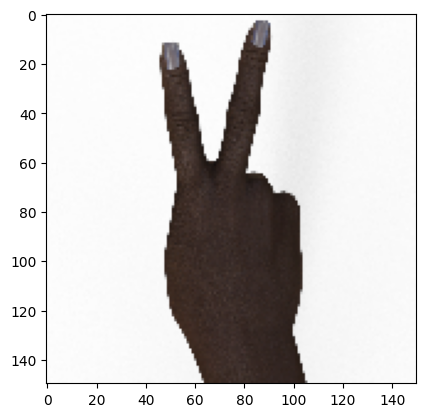

In [28]:
# prompt: take user input image and classify it  as an image of rock, paper or scissors in sign language, using the model above

import numpy as np
import tensorflow as tf
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0][0] == 1:
    print("Paper")
  elif classes[0][1] == 1:
    print("Rock")
  elif classes[0][2] == 1:
    print("Scissors")
